In [47]:
pip install pandas matplotlib seaborn mplfinance

   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
from mplfinance.original_flavor import candlestick_ohlc
# dataset used: https://www.kaggle.com/datasets/umerhaddii/big-tech-giants-stock-price-data?select=big_tech_stock_prices.csv

In [2]:
file_path = 'big_tech_stock_prices.csv'
data = pd.read_csv(file_path)

In [3]:
file_path2 = 'big_tech_companies.csv'
data2 = pd.read_csv(file_path2)

In [4]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  stock_symbol        date      open      high       low     close  adj_close  \
0         AAPL  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800  


In [5]:
data['date'] = pd.to_datetime(data['date'])

In [6]:
def get_stock_data(stock_symbol):
    return data[data['stock_symbol'] == stock_symbol]

In [7]:
def plot_stock_trends(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['close'], label='Close Price')
    plt.plot(stock_data['date'], stock_data['adj_close'], label='Adjusted Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock_symbol} Stock Price Trends')
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
def stock_statistics(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    print(f"Statistics for {stock_symbol}:")
    print(stock_data.describe())

In [9]:
def plot_volume_trends(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['volume'], label='Volume', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title(f'{stock_symbol} Stock Volume Trends')
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
def plot_moving_averages(stock_symbol, window1=20, window2=50):
    stock_data = get_stock_data(stock_symbol)
    stock_data['MA20'] = stock_data['close'].rolling(window=window1).mean()
    stock_data['MA50'] = stock_data['close'].rolling(window=window2).mean()
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['close'], label='Close Price')
    plt.plot(stock_data['date'], stock_data['MA20'], label=f'{window1}-Day MA')
    plt.plot(stock_data['date'], stock_data['MA50'], label=f'{window2}-Day MA')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock_symbol} Moving Averages')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
def plot_daily_returns(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    stock_data['Daily Return'] = stock_data['close'].pct_change()
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['date'], stock_data['Daily Return'], label='Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.title(f'{stock_symbol} Daily Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def plot_correlation_matrix():
    stock_symbols = data['stock_symbol'].unique()
    close_prices = pd.DataFrame()
    for symbol in stock_symbols:
        stock_data = get_stock_data(symbol)
        close_prices[symbol] = stock_data.set_index('date')['close']
    correlation_matrix = close_prices.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Stock Closing Prices')
    plt.show()

In [13]:
def plot_candlestick_chart(stock_symbol):
    stock_data = get_stock_data(stock_symbol)
    stock_data = stock_data[['date', 'open', 'high', 'low', 'close']]
    stock_data['date'] = stock_data['date'].map(mdates.date2num)
    fig, ax = plt.subplots(figsize=(14, 7))
    candlestick_ohlc(ax, stock_data.values, width=0.6, colorup='g', colordown='r', alpha=0.8)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{stock_symbol} Candlestick Chart')
    plt.grid(True)
    plt.show()

In [14]:
print(data2)

   stock_symbol                                      company
0          AAPL                                   Apple Inc.
1          ADBE                                   Adobe Inc.
2          AMZN                             Amazon.com, Inc.
3           CRM                             Salesforce, Inc.
4          CSCO                          Cisco Systems, Inc.
5         GOOGL                                Alphabet Inc.
6           IBM  International Business Machines Corporation
7          INTC                            Intel Corporation
8          META                         Meta Platforms, Inc.
9          MSFT                        Microsoft Corporation
10         NFLX                                Netflix, Inc.
11         NVDA                           NVIDIA Corporation
12         ORCL                           Oracle Corporation
13         TSLA                                  Tesla, Inc.


In [15]:
stock_symbol = input("Enter stock symbol: ")

Enter stock symbol:  GOOGL


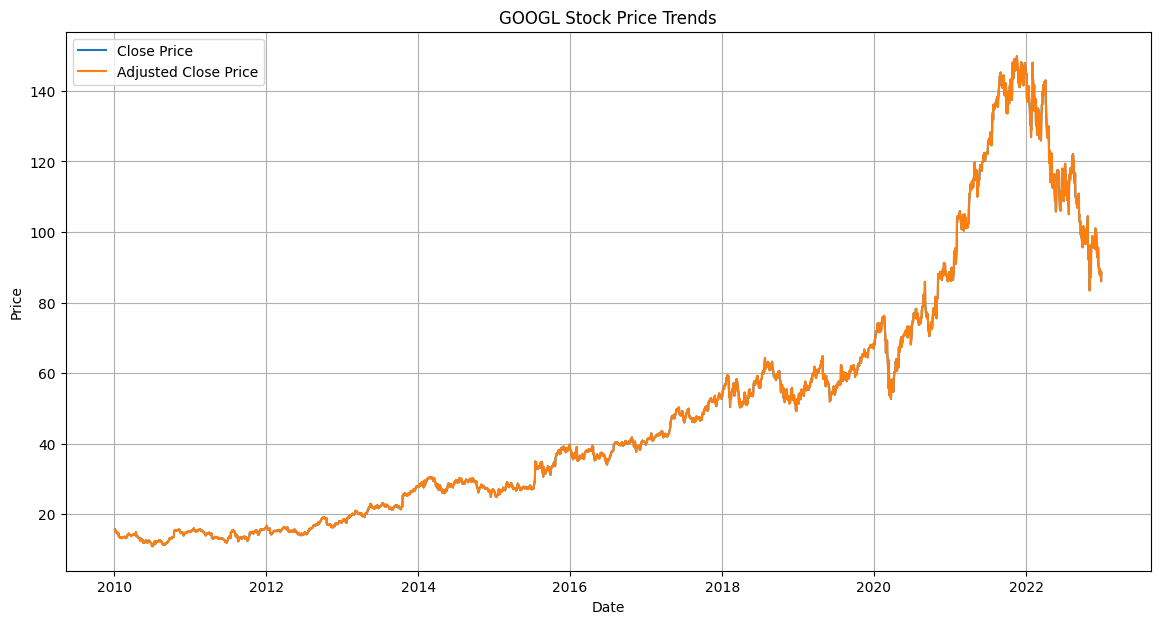

In [16]:
plot_stock_trends(stock_symbol)

In [17]:
stock_statistics(stock_symbol)

Statistics for GOOGL:
                                date         open         high          low  \
count                           3271  3271.000000  3271.000000  3271.000000   
mean   2016-07-01 19:28:22.598593792    49.149625    49.638485    48.641724   
min              2010-01-04 00:00:00    10.968719    11.068068    10.851602   
25%              2013-04-04 12:00:00    20.262137    20.420045    20.163288   
50%              2016-07-01 00:00:00    38.521000    38.930000    38.219501   
75%              2019-10-01 12:00:00    61.757750    62.252251    61.198750   
max              2022-12-29 00:00:00   151.250000   151.546494   148.899002   
std                              NaN    35.809816    36.215672    35.386841   

             close    adj_close        volume  
count  3271.000000  3271.000000  3.271000e+03  
mean     49.148954    49.148954  6.018647e+07  
min      10.912663    10.912663  9.312000e+06  
25%      20.289915    20.289915  2.895000e+07  
50%      38.538502    38.5

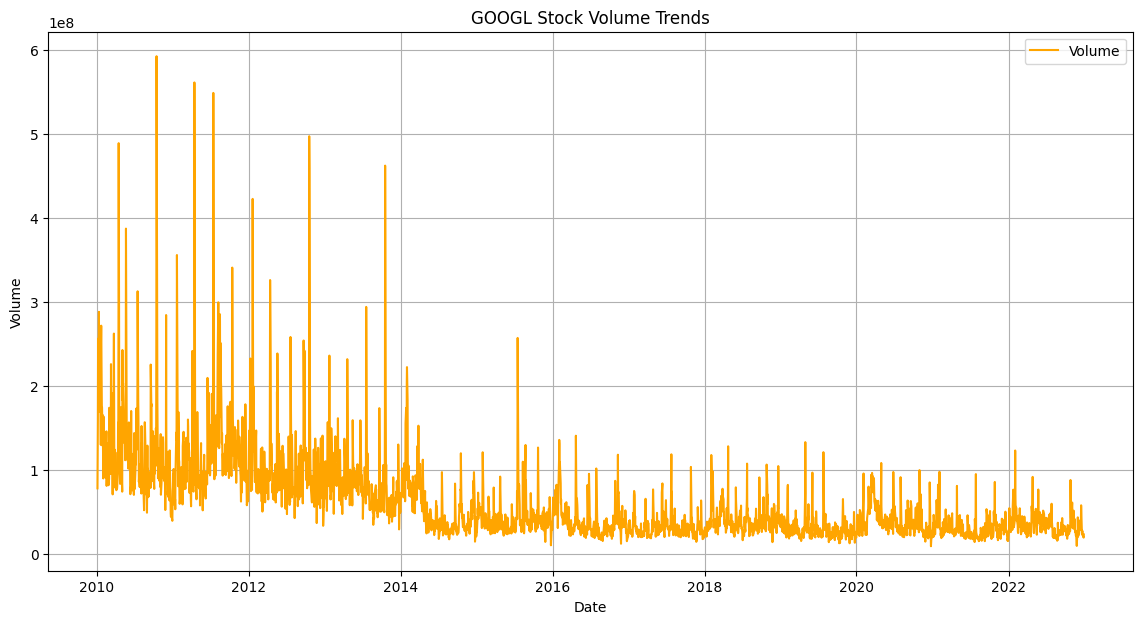

In [18]:
plot_volume_trends(stock_symbol)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3264\2929097656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['MA20'] = stock_data['close'].rolling(window=window1).mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_3264\2929097656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['MA50'] = stock_data['close'].rolling(window=window2).mean()


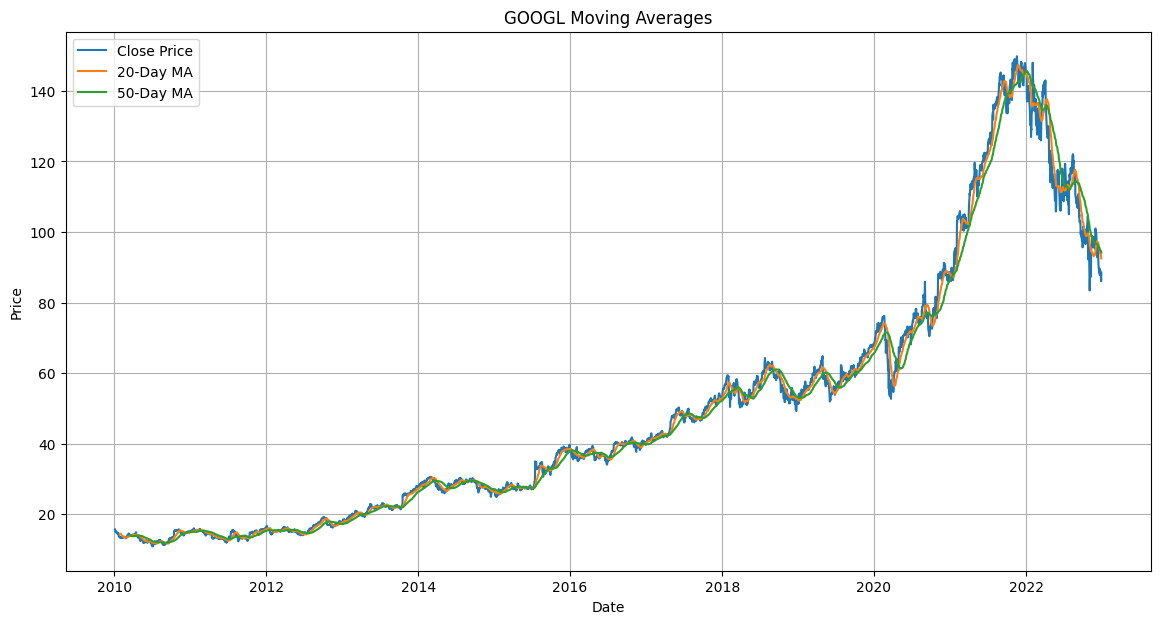

In [19]:
plot_moving_averages(stock_symbol)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3264\1944979067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Daily Return'] = stock_data['close'].pct_change()


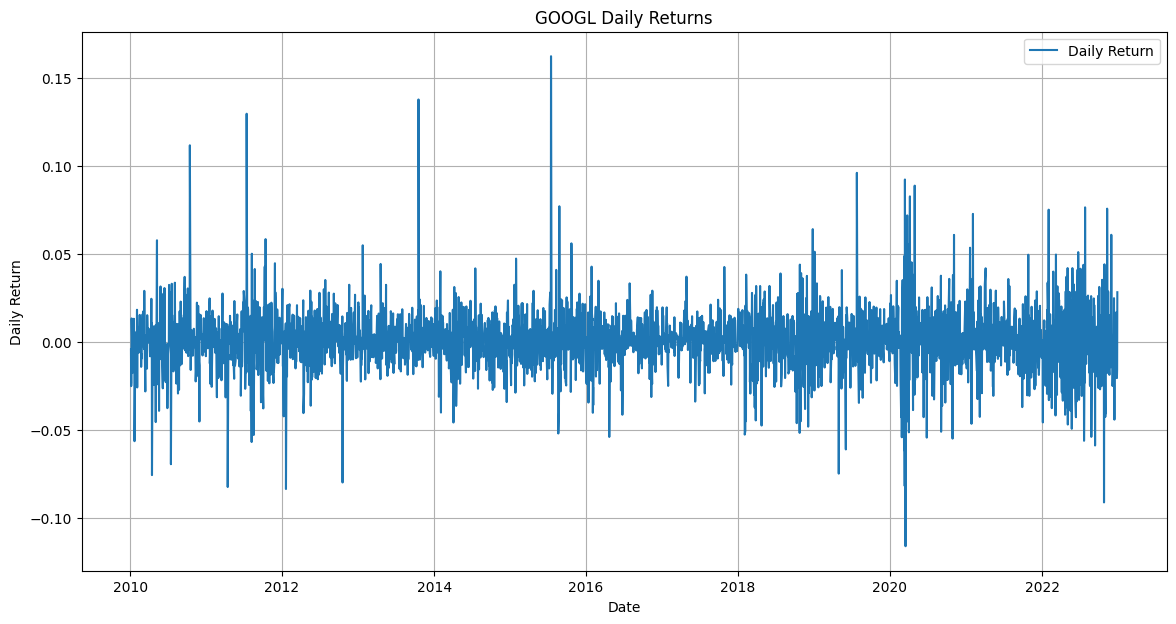

In [20]:
plot_daily_returns(stock_symbol)

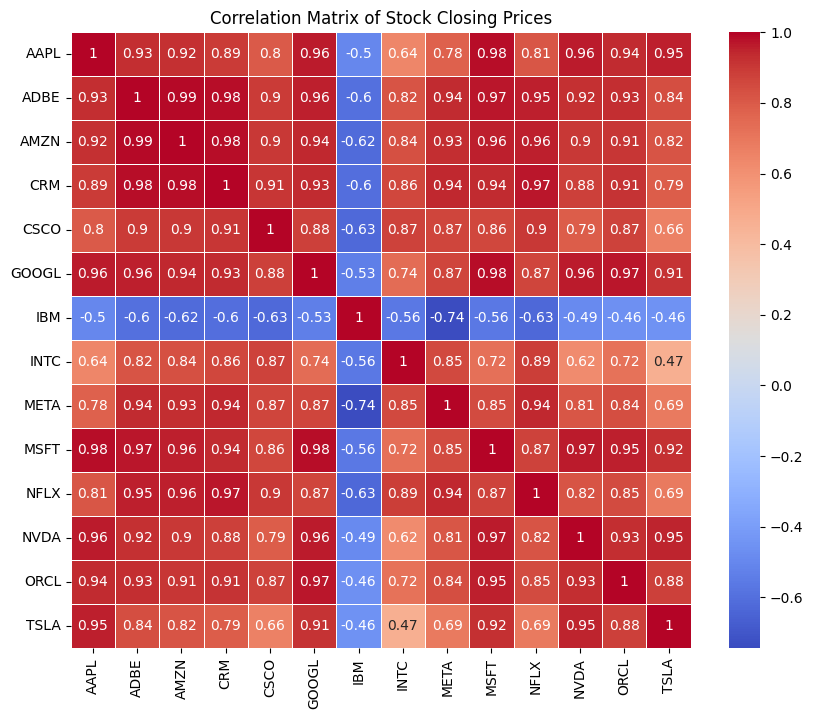

In [21]:
plot_correlation_matrix()

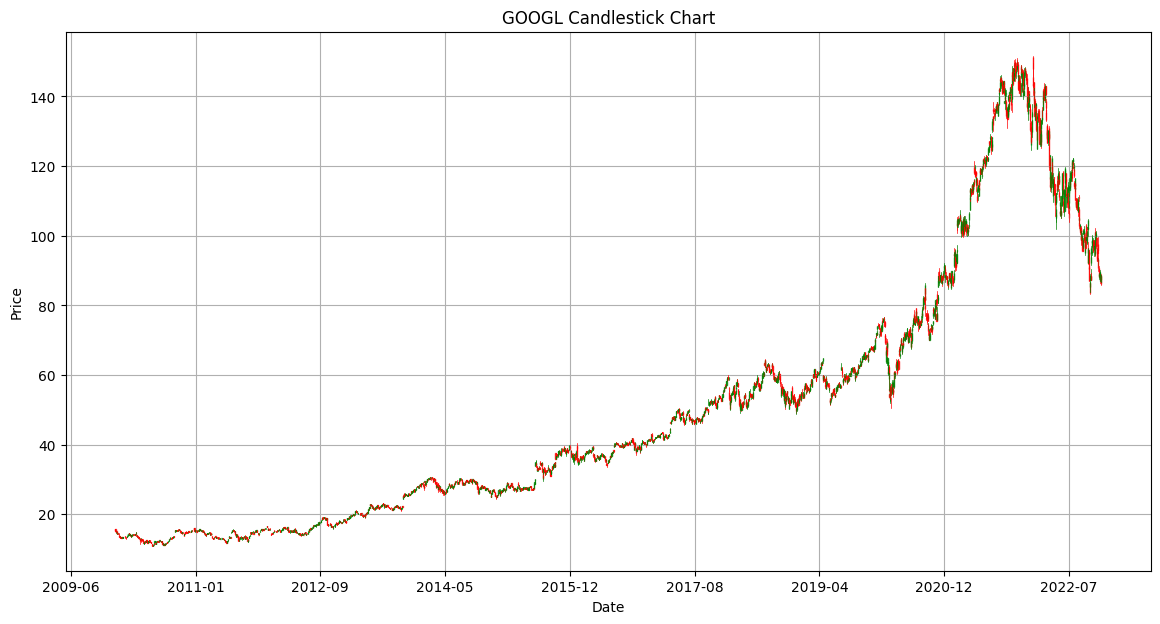

In [22]:
plot_candlestick_chart(stock_symbol)